In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import string

## Part 1 Get Data

In [2]:
azimuth_neg90 = pd.read_csv('lab1_azimuth_-90.csv')
azimuth_0 = pd.read_csv('lab1_azimuth_00.csv')
azimuth_90 = pd.read_csv('lab1_azimuth_90.csv')

In [74]:
azimuth_neg90

,Range(m),Elevation(degrees),Azimuth(degrees),Reflectivity,Time Stamp(s),Latitude,Longitude,Time Stamp(s).1
0,9.272,1.0,269.588125,21.0,2453.166531,34.106412,-117.712031,2453.257143
1,9.276,1.0,269.783125,21.0,2453.166531,34.106412,-117.712031,2453.257143
2,9.278,1.0,270.138125,19.0,2454.266701,34.106412,-117.712031,2454.344943
3,9.280,1.0,270.333125,22.0,2454.266701,34.106412,-117.712031,2454.344943
4,9.266,1.0,269.888333,19.0,2454.566627,34.106412,-117.712031,2454.643000
...,...,...,...,...,...,...,...,...
1135,9.290,1.0,270.578333,56.0,2750.566697,34.106410,-117.712028,2750.819596
1136,9.274,1.0,269.688333,19.0,2751.166548,34.106410,-117.712028,2751.245629
1137,9.284,1.0,269.888333,17.0,2751.166548,34.106410,-117.712028,2751.245629
1138,9.264,1.0,269.507917,22.0,2751.466474,34.106410,-117.712028,2751.543909


In [3]:
range_neg90 = azimuth_neg90['Range(m)'].to_numpy()
range_0 = azimuth_0['Range(m)'].to_numpy()
range_90 = azimuth_90['Range(m)'].to_numpy()

In [4]:
mean_neg90 = azimuth_neg90['Range(m)'].mean()

In [5]:
std_neg90 = azimuth_neg90['Range(m)'].std()

## Part 2 Create Histograms

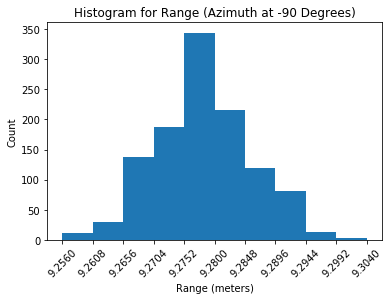

In [31]:
_, bins, _ = plt.hist(range_neg90, 10)
plt.title("Histogram for Range (Azimuth at -90 Degrees)")
plt.xlabel("Range (meters)")
plt.ylabel("Count")
plt.xticks(bins, rotation = 45)
plt.show()

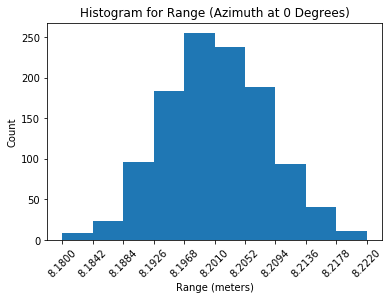

In [33]:
_, bins, _ = plt.hist(range_0, 10)
plt.title("Histogram for Range (Azimuth at 0 Degrees)")
plt.xlabel("Range (meters)")
plt.ylabel("Count")
plt.xticks(bins, rotation = 45)
plt.show()

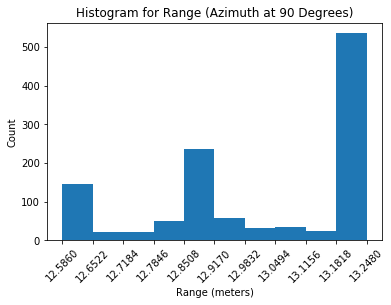

In [34]:
_, bins, _ = plt.hist(range_90, 10)
plt.title("Histogram for Range (Azimuth at 90 Degrees)")
plt.xlabel("Range (meters)")
plt.ylabel("Count")
plt.xticks(bins, rotation = 45)
plt.show()

## Part 3 Create Model

In [9]:
[range_neg90_count, range_neg90_binEdges] = np.histogram(range_neg90, bins=10)

In [10]:
normalizedCount = range_neg90_count / azimuth_neg90['Range(m)'].count()

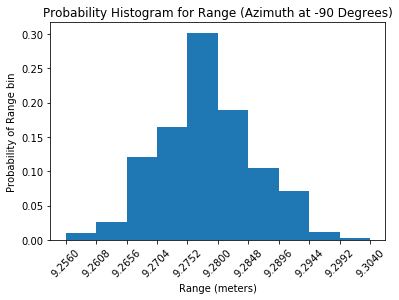

In [37]:
plt.hist(range_neg90_binEdges[:-1], range_neg90_binEdges, weights=normalizedCount)
plt.title("Probability Histogram for Range (Azimuth at -90 Degrees)")
plt.xlabel("Range (meters)")
plt.ylabel("Probability of Range bin")
plt.xticks(range_neg90_binEdges, rotation = 45)
plt.show()

Using this as a comparison to ultimate gaussian model. Shows probabilities of occuring in each range bin (normalized count vals by dividing by total data count)

In [36]:
mean_neg90, std_neg90

(9.278552631578954, 0.007498307804723954)

Based on the shape of the -90 degree distrubtion, a normal distribution seems like the best fit for our model. We find the mean of the data and the standard deviation to define the model.

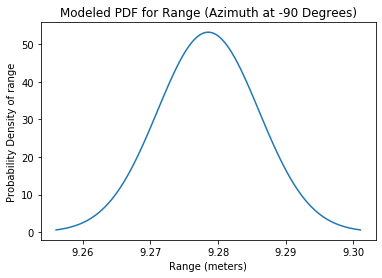

In [38]:
x = np.linspace(mean_neg90 - 3*std_neg90, mean_neg90 + 3*std_neg90, 100)
plt.plot(x, stats.norm.pdf(x, mean_neg90, std_neg90))
plt.title("Modeled PDF for Range (Azimuth at -90 Degrees)")
plt.xlabel("Range (meters)")
plt.ylabel("Probability Density of range")
plt.show()

Checking that our PDF has an area under of 1 (close enough)

In [13]:
np.trapz(stats.norm.pdf(x, mean_neg90, std_neg90), x=x)

0.997292067626924

In [14]:
stats.norm(mean_neg90, std_neg90).cdf(9.2656) - stats.norm(mean_neg90, std_neg90).cdf(9.2608)

0.03309416255844499

To validate the model, we look at the experimentally determined probability of each ranges and calculate the probability (area under pdf) to compare them

In [15]:
for prob in normalizedCount:
    print(prob)

0.009649122807017544
0.02631578947368421
0.12017543859649123
0.16403508771929826
0.3017543859649123
0.18859649122807018
0.10438596491228071
0.07105263157894737
0.011403508771929825
0.002631578947368421


In [16]:
for i in range(len(range_neg90_binEdges) - 1):
    print(stats.norm(mean_neg90, std_neg90).cdf(range_neg90_binEdges[i+1]) - stats.norm(mean_neg90, std_neg90).cdf(range_neg90_binEdges[i]))

0.007636927529162376
0.03309416255846626
0.09641305797387179
0.18893444907978663
0.2491359220650043
0.22109499455857284
0.13204122946056274
0.05305233868656534
0.01433358288062303
0.002602439019544711


## Part 4 Transform and plot the GPS measurements

In [17]:
lat_0 = azimuth_0['Latitude'].to_numpy()
long_0 = azimuth_0['Longitude'].to_numpy()

origin_lat = np.mean(lat_0)
origin_long = np.mean(long_0)

In [40]:
origin_lat, origin_long

(34.10641567984768, -117.71199024487404)

In [39]:
lat_0[0], long_0[0]

(34.10643333333333, -117.71203216666665)

In [18]:
azimuth_0

,Range(m),Elevation(degrees),Azimuth(degrees),Reflectivity,Time Stamp(s),Latitude,Longitude,Time Stamp(s).1
0,8.186,1.0,0.178333,11.0,1317.391977,34.106433,-117.712032,1317.436316
1,8.194,1.0,0.378333,11.0,1317.391977,34.106433,-117.712032,1317.436316
2,8.208,1.0,0.108333,13.0,1317.691902,34.106433,-117.712032,1317.767028
3,8.198,1.0,0.308333,13.0,1317.691902,34.106433,-117.712032,1317.767028
4,8.194,1.0,0.158542,11.0,1318.291754,34.106433,-117.712032,1318.362909
...,...,...,...,...,...,...,...,...
1133,8.214,1.0,0.567917,13.0,1914.591673,34.106417,-117.711992,1914.677234
1134,8.194,1.0,0.238333,11.0,1915.391918,34.106417,-117.711992,1915.471758
1135,8.200,1.0,0.438333,13.0,1915.391918,34.106417,-117.711992,1915.471758
1136,8.196,1.0,0.088333,13.0,1915.991769,34.106417,-117.711992,1916.072516


In [19]:
def getCoord(point, origin):    
    pointLat = np.array(point[0])
    pointLong = np.array(point[1])
    
    earthCirc = 40008000
    dx = (pointLong - origin[1])*earthCirc*np.cos((pointLat + origin[0])*np.pi/360)/360
    dy = (pointLat - origin[0])*earthCirc/360
    
    return [dx, dy]


In [20]:
[xCoord, yCoord] = getCoord(np.array([lat_0, long_0]), np.array([origin_lat, origin_long]))

In [41]:
getCoord([15, -15], [0,0])

[-1652738.583910142, 1667000.0]

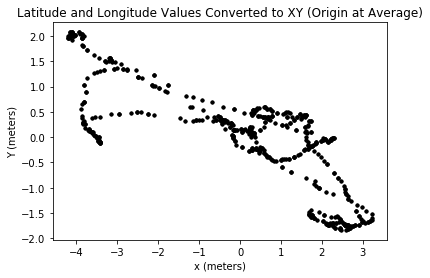

In [42]:
plt.plot(xCoord, yCoord, '.k')
plt.title("Latitude and Longitude Values Converted to XY (Origin at Average)")
plt.xlabel("x (meters)")
plt.ylabel("Y (meters)")
plt.show()

In [22]:
np.square(np.std(xCoord))

4.992026640165638

In [23]:
np.square(np.std(yCoord))

1.0122727924461241

## Implement Bayes Rule

In [116]:
std_neg90
range_neg90


array([9.272, 9.276, 9.278, ..., 9.284, 9.264, 9.274])

In [145]:
#values we will need in our calculation of p(xi|z)
x_pos = np.array([-1.4, -1.3, -1.2, -1.1])
d = 11 + x_pos
pxi = .25
z_rangeMeas = range_neg90[0]
#z_rangeMeas = 9.75
epsilon = 0.4
z_rangeMeas, d

(9.272, array([9.6, 9.7, 9.8, 9.9]))

In [146]:
z_rangeMeas

9.272

In [147]:
#calculate p(z|xi)
pzxi = np.zeros(4)

for i in range(len(pdf_list)):
    pzxi[i] = stats.norm(d[i], std_neg90).cdf(z_rangeMeas + epsilon) - stats.norm(d[i], std_neg90).cdf(z_rangeMeas - epsilon)
pzxi
    

array([1.00000000e+000, 9.41654346e-005, 1.23003269e-065, 2.22888903e-203])

In [115]:
#calculate p(z)
pz = np.sum(pzxi*pxi)

In [95]:
pxiz = pzxi*pxi/(pz + 1e-9)
pxiz

array([0., 0., 0., 0.])

In [96]:
#what is the most likely state
state = np.argmax(pxiz) + 1
state

1

## Part 6 Create Police Data Model

In [226]:
policeData = pd.read_csv('police_killings_cleaned.csv')
policeData = policeData[['race', 'age']]
policeData = policeData.dropna(axis='rows')
#policeData = policeData[policeData['Victim\'s age'] != "Unknown"]
#ageVar = 'Victim\'s age'


In [227]:
policeData

,race,age
0,White,28
1,Black,57
2,Black,23
3,Black,37
4,White,49
...,...,...
7452,Hispanic,49
7453,Black,31
7454,Hispanic,21
7455,White,21


In [228]:
age = policeData['age'].to_numpy()

In [241]:
np.max(age), np.min(age), np.median(age)

(107, 1, 34.0)

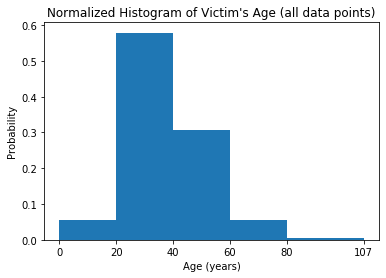

1.0

In [242]:
#plt.hist(age, bins = [0, 16, 21, 26, 31])
bins = np.array([0, 20, 40, 60, 80, np.max(age)])
[ageCount, ageEdges] = np.histogram(age, bins = bins)
plt.hist(ageEdges[:-1], ageEdges, weights = ageCount/policeData['age'].count())
plt.xticks(ageEdges)
plt.title("Normalized Histogram of Victim's Age (all data points)")
plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.show()
np.sum(ageCount/policeData['age'].count())

In [240]:
black = policeData.loc[policeData['race'] == 'Black']
white = policeData.loc[policeData['race'] == 'White']
hispanic = policeData.loc[policeData['race'] == 'Hispanic']
asian = policeData.loc[policeData['race'] == 'Asian']

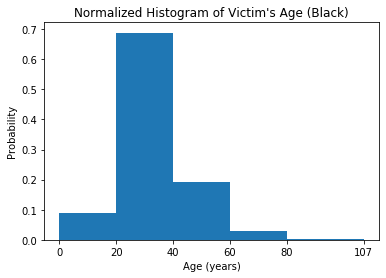

1.0

In [247]:
[ageCount, ageEdges] = np.histogram(black['age'], bins = bins)
plt.hist(ageEdges[:-1], ageEdges, weights = ageCount/black['age'].count())
plt.xticks(ageEdges)
plt.title("Normalized Histogram of Victim's Age (Black)")
plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.show()
np.sum(ageCount/black['age'].count())

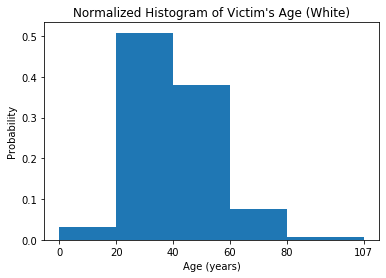

1.0

In [248]:
[ageCount, ageEdges] = np.histogram(white['age'], bins = bins)
plt.hist(ageEdges[:-1], ageEdges, weights = ageCount/white['age'].count())
plt.xticks(ageEdges)
plt.title("Normalized Histogram of Victim's Age (White)")
plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.show()
np.sum(ageCount/white['age'].count())

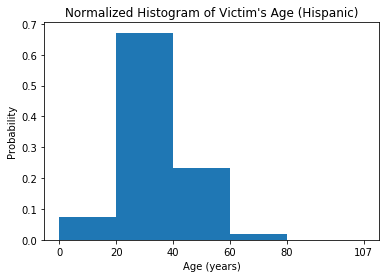

1.0

In [249]:
[ageCount, ageEdges] = np.histogram(hispanic['age'], bins = bins)
plt.hist(ageEdges[:-1], ageEdges, weights = ageCount/hispanic['age'].count())
plt.xticks(ageEdges)
plt.title("Normalized Histogram of Victim's Age (Hispanic)")
plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.show()
np.sum(ageCount/hispanic['age'].count())

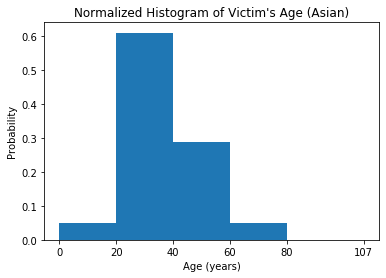

1.0

In [250]:
[ageCount, ageEdges] = np.histogram(asian['age'], bins = bins)
plt.hist(ageEdges[:-1], ageEdges, weights = ageCount/asian['age'].count())
plt.xticks(ageEdges)
plt.title("Normalized Histogram of Victim's Age (Asian)")
plt.xlabel("Age (years)")
plt.ylabel("Probability")
plt.show()
np.sum(ageCount/asian['age'].count())

In [ ]:
np.sum(np.array([0.37135279, 0.4005305 , 0.17241379, 0.04509284, 0.01061008]))